#  Chapter 6, demo 1

Bayesian Data Analysis, 3rd ed


Posterior predictive checking demo

In [1]:
import os
import numpy as np
import preliz as pz

import matplotlib.pyplot as plt
pz.style.use('preliz-doc')

In [2]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
s = np.sqrt(s2)
my = np.mean(y)

In [3]:
# Create 9 random replicate data sets from the posterior predictive density.
# Each set has same number of virtual observations as the original data set.
dist = pz.StudentT(nu=n-1, mu=my, sigma=np.sqrt(s2*(1+1/n)))

replicates = dist.rvs(size=(9,n))

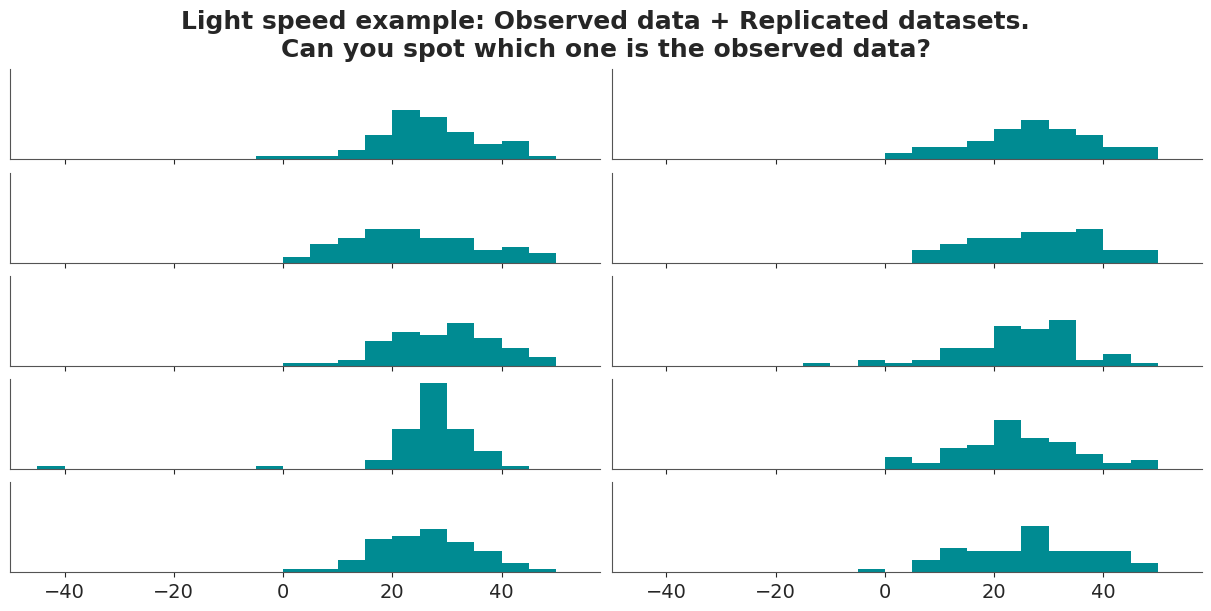

In [4]:
# plot them along with the real data set in random order subplot
fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(12, 6))
order = np.random.permutation(10)
for order_i, ax in zip(order, axes.flat):
    ax.hist(
        replicates[order_i] if order_i < 9 else y,
        np.arange(-45, 55, 5)
    )
    ax.set_yticks([])
axes[0, 0].set_xlim([-50, 58])
fig.suptitle(
    "Light speed example: Observed data + Replicated datasets.\n"
    "Can you spot which one is the observed data?"
);

#### Compare the minimum of the real data set into the minimum of a replicated dataset.

The distribution of the minimum value of a replicated data set can be 
calculated analytically. Consider $n$ samples of $X_i$, where $X_i$ has cumulative distribution function $F(x)$ and probability distribution function $f(x)$. The cumulative distribution function of the minimum of the $n$ samples is $1 - (1 - F(x))^n$ and the probability distribution function is its derivative $n f(x) (1 - F(x))^{n-1}$.

In [5]:
# Calculate the pdf of the minimum of a replicated dataset
x = np.linspace(-60, 20, 150)
pdf = dist.pdf(x)
cdf = dist.cdf(x)
pdf_min = n * pdf * (1 - cdf)**(n-1)

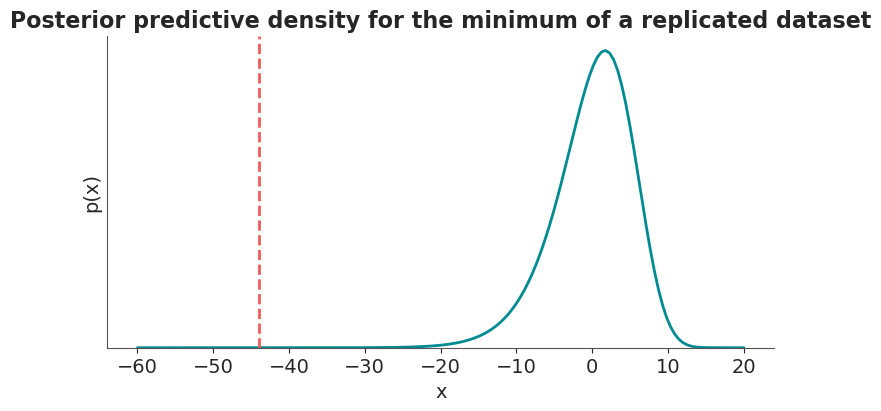

In [6]:
_, ax = plt.subplots(figsize=(7, 4))
ax.plot(x, pdf_min, '-', lw=2)
ax.axvline(y.min(), color='C2', ls='--', lw=2)

ax.set(xlabel='x', ylabel='p(x)', yticks=[], ylim=0)
ax.set_title("Posterior predictive density for the minimum of a replicated dataset");
